In [1]:
%cd ..
from src.utils import load_data
from src.algos import *

NUM_STARTS = 10

e:\coding\essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 2579
algorithm: SIMULATED ANNEALING
n_iter: 1000
solving time: 0.282 s
history: [5630, 5559, 5591, 5606, 5386, 5322, 5268, 5110, 4994, 4993, 5010, 4538, 4521, 4479, 4288, 4238, 4238, 4218, 4192, 4141, 4123, 3969, 3882, 3782, 3774, 3653, 3641, 3633, 3543, 3506, 3477, 3401, 3364, 3252, 3236, 3195, 3070, 3066, 3016, 2863, 2829, 2792, 2785, 2750, 2695, 2679, 2592, 2579]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

best distance: 2293
algorithm: NEAREST NEIGHBOUR
solving time: 0.021 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 2297
algorithm: TABU SEARCH
n_iter: 30
solving time: 3.366 s
history: [6336, 5519, 4933, 4389, 4028, 3683, 3417, 3201, 3104, 2976, 2887, 2801, 2730, 2710, 2695, 2651, 2638, 2610, 2604, 2569, 2538, 2534, 2534, 2405, 2339, 2321, 2291, 2289, 2292, 2291, 2297]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 2439
algorithm: HILL CLIMBER
n_iter: 25
solving time: 2.810 s
history: [5812, 5103, 4721, 4347, 4057, 3779, 3579, 3406, 3315, 3236, 3166, 3069, 3004, 2887, 2835, 2768, 2730, 2698, 2619, 2594, 2573, 2545, 2514, 2506, 2457, 2439]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

Parallel time for HILL CLIMBER: 12.580 s


best distance: 2215
algorithm: HILL CLIMBER
n_iter: 25
solving time: 3.403 s
history: [6572, 5775, 5077, 4634, 4229, 3927, 3710, 3527, 3360, 3254, 3156, 2793, 2718, 2660, 2593, 2543, 2512, 2483, 2455, 2406, 2379, 2352, 2331, 2315, 2265, 2215]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

Parallel time for SIMULATED ANNEALING: 0.117 s


best distance: 3561
algorithm: SIMULATED ANNEALING
n_iter: 100
solving time: 0.030 s
history: [6301, 6434, 6445, 6451, 6311, 6217, 6130, 6113, 5971, 5906, 5903, 6002, 5747, 5909, 5893, 5765, 5589, 5544, 5276, 5362, 5403, 4854, 4653, 4638, 4648, 4479, 4151, 3873, 3792, 3713, 3571, 3561]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

Parallel time for TABU SEARCH: 12.028 s


best distance: 2213
algorithm: TABU SEARCH
n_iter: 30
solving time: 4.149 s
history: [6024, 5320, 4865, 4422, 4011, 3725, 3495, 3357, 3225, 3103, 3010, 2934, 2858, 2771, 2705, 2626, 2551, 2506, 2462, 2390, 2342, 2300, 2245, 2237, 2229, 2225, 2207, 2199, 2197, 2205, 2213]

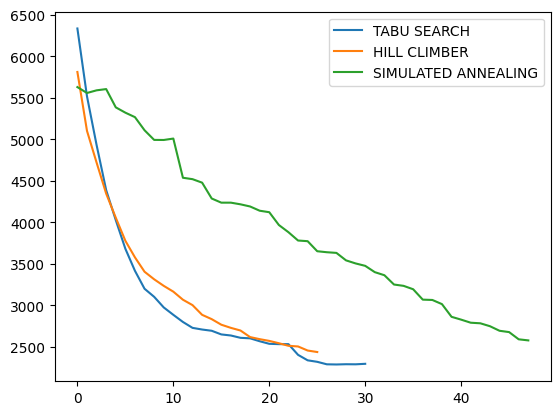

In [10]:
from matplotlib import pyplot as plt
plt.plot(t.history, label=t.NAME)
plt.plot(h.history, label=h.NAME)
plt.plot(s.history, label=s.NAME)
plt.legend()

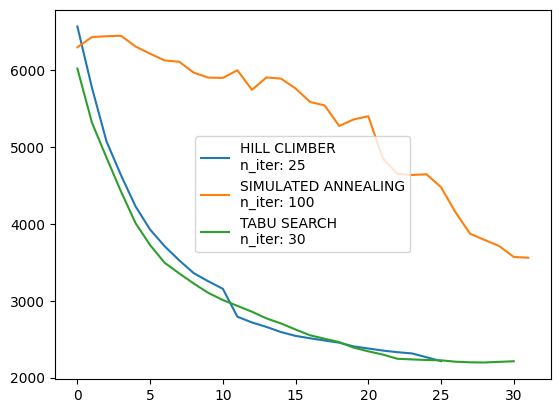

In [11]:
plt.plot(a.distance_history, label=a.algorithm)
plt.plot(b.distance_history, label=b.algorithm)
plt.plot(c.distance_history, label=c.algorithm)
plt.legend()